## Analyse Exploratoire

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_FR_food= pd.read_csv('France_food_clean.csv')
df_FR_food.head()

,code,product_name,categories,energy_kcal_100g,energy_100g,fat_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g,carbohydrates_100g,nutriscore_grade
0,69005138,"Pavés de saumon, nature",Protides,168.0,703.0,10.3,1.4,0.0,0.0,18.9,0.10,0.040,-2.0,6.0,1.0
1,20712075,Penne au poulet sauce pesto,Protides,168.0,703.0,6.0,1.2,0.9,0.0,8.9,0.82,0.328,1.0,6.0,1.0
2,3181232519946,Bifteck haché Dégustation,Protides,168.0,703.0,10.0,4.4,0.1,0.0,19.5,0.18,0.072,1.0,6.0,1.0
3,3229820796543,Boulghour de la mer aux algues,Protides,168.0,703.0,3.6,0.4,1.2,5.9,5.9,0.28,0.112,-5.0,6.0,1.0
4,3256221977936,Saumon fumé d'Irlande 8 tranches,Protides,168.0,703.0,8.3,1.8,0.4,0.0,23.1,2.90,1.160,13.0,6.0,1.0


In [11]:
df_FR_food.shape

(19240, 15)

In [12]:
df_FR_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19240 entries, 0 to 19239
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     19240 non-null  int64  
 1   product_name             19240 non-null  object 
 2   categories               19240 non-null  object 
 3   energy_kcal_100g         19240 non-null  float64
 4   energy_100g              19240 non-null  float64
 5   fat_100g                 19240 non-null  float64
 6   saturated_fat_100g       19240 non-null  float64
 7   sugars_100g              19240 non-null  float64
 8   fiber_100g               19240 non-null  float64
 9   proteins_100g            19240 non-null  float64
 10  salt_100g                19240 non-null  float64
 11  sodium_100g              19240 non-null  float64
 12  nutrition_score_fr_100g  19240 non-null  float64
 13  carbohydrates_100g       19240 non-null  float64
 14  nutriscore_grade      

In [13]:
df_FR_food['categories'].unique()

array(['Protides', 'Fruits & légumes', 'laitier', 'minéraux', 'Céréale',
       'vitamines'], dtype=object)

### Analyse univariées

#### valeures qualitative 

<AxesSubplot:xlabel='categories', ylabel='count'>

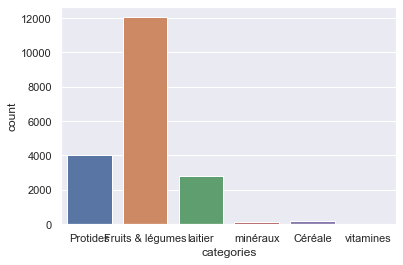

In [17]:
sns.countplot(x="categories", data=df_FR_food)

#### valeures quantitative 

In [14]:
df_FR_food.columns

Index(['code', 'product_name', 'categories', 'energy_kcal_100g', 'energy_100g',
       'fat_100g', 'saturated_fat_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition_score_fr_100g',
       'carbohydrates_100g', 'nutriscore_grade'],
      dtype='object')

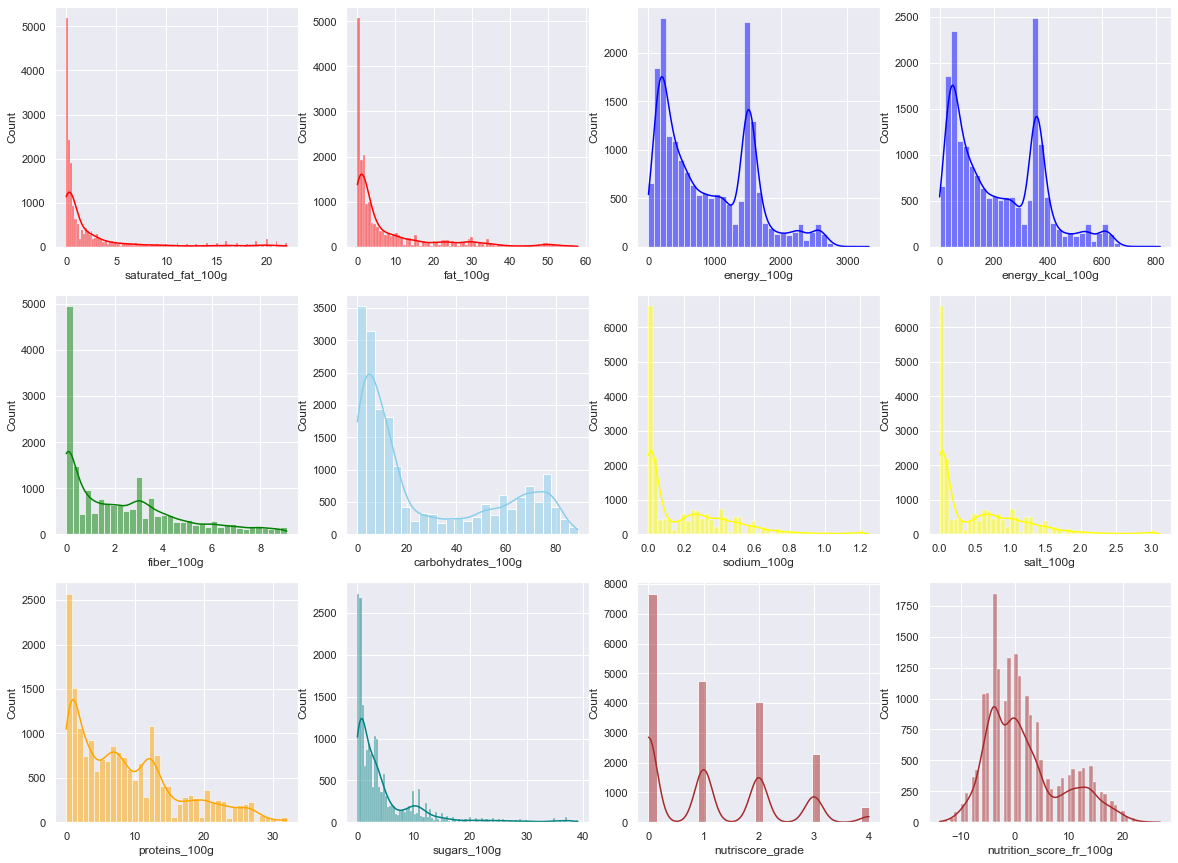

In [15]:

sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 4, figsize=(20,15))

sns.histplot(data=df_FR_food, x="saturated_fat_100g", kde=True, color="red", ax=axs[0, 0])
sns.histplot(data=df_FR_food, x="fat_100g", kde=True, color="red", ax=axs[0, 1])

sns.histplot(data=df_FR_food, x="energy_100g", kde=True, color="blue", ax=axs[0, 2])
sns.histplot(data=df_FR_food, x="energy_kcal_100g", kde=True, color="blue", ax=axs[0, 3])

sns.histplot(data=df_FR_food, x="fiber_100g", kde=True, color="green", ax=axs[1, 0])
sns.histplot(data=df_FR_food, x="carbohydrates_100g", kde=True, color="skyblue", ax=axs[1, 1])

sns.histplot(data=df_FR_food, x="sodium_100g", kde=True, color="yellow", ax=axs[1, 2])
sns.histplot(data=df_FR_food, x="salt_100g", kde=True, color="yellow", ax=axs[1, 3])

sns.histplot(data=df_FR_food, x="proteins_100g", kde=True, color="orange", ax=axs[2, 0])
sns.histplot(data=df_FR_food, x="sugars_100g", kde=True, color="teal", ax=axs[2, 1])

sns.histplot(data=df_FR_food, x="nutriscore_grade", kde=True, color="brown", ax=axs[2, 2])
sns.histplot(data=df_FR_food, x="nutrition_score_fr_100g", kde=True, color="brown", ax=axs[2, 3])

plt.show()

#### Les histogrammes de 'salt_100g' & 'sodium_100g' se ressemble donc nous n'en gardons qu'un seul.

#### la même chose pour 'energy_100g' et 'energy_kcal_100g' & 'fat_100g' et ' saturated_fat_100g'

In [16]:
df_FR_food_1=df_FR_food.drop(['energy_100g','salt_100g', 'fat_100g'], axis=1)

### Analyse bivariées

#### Relation entre "nutrition_score_fr_100g" et autres caractéristiques numériques

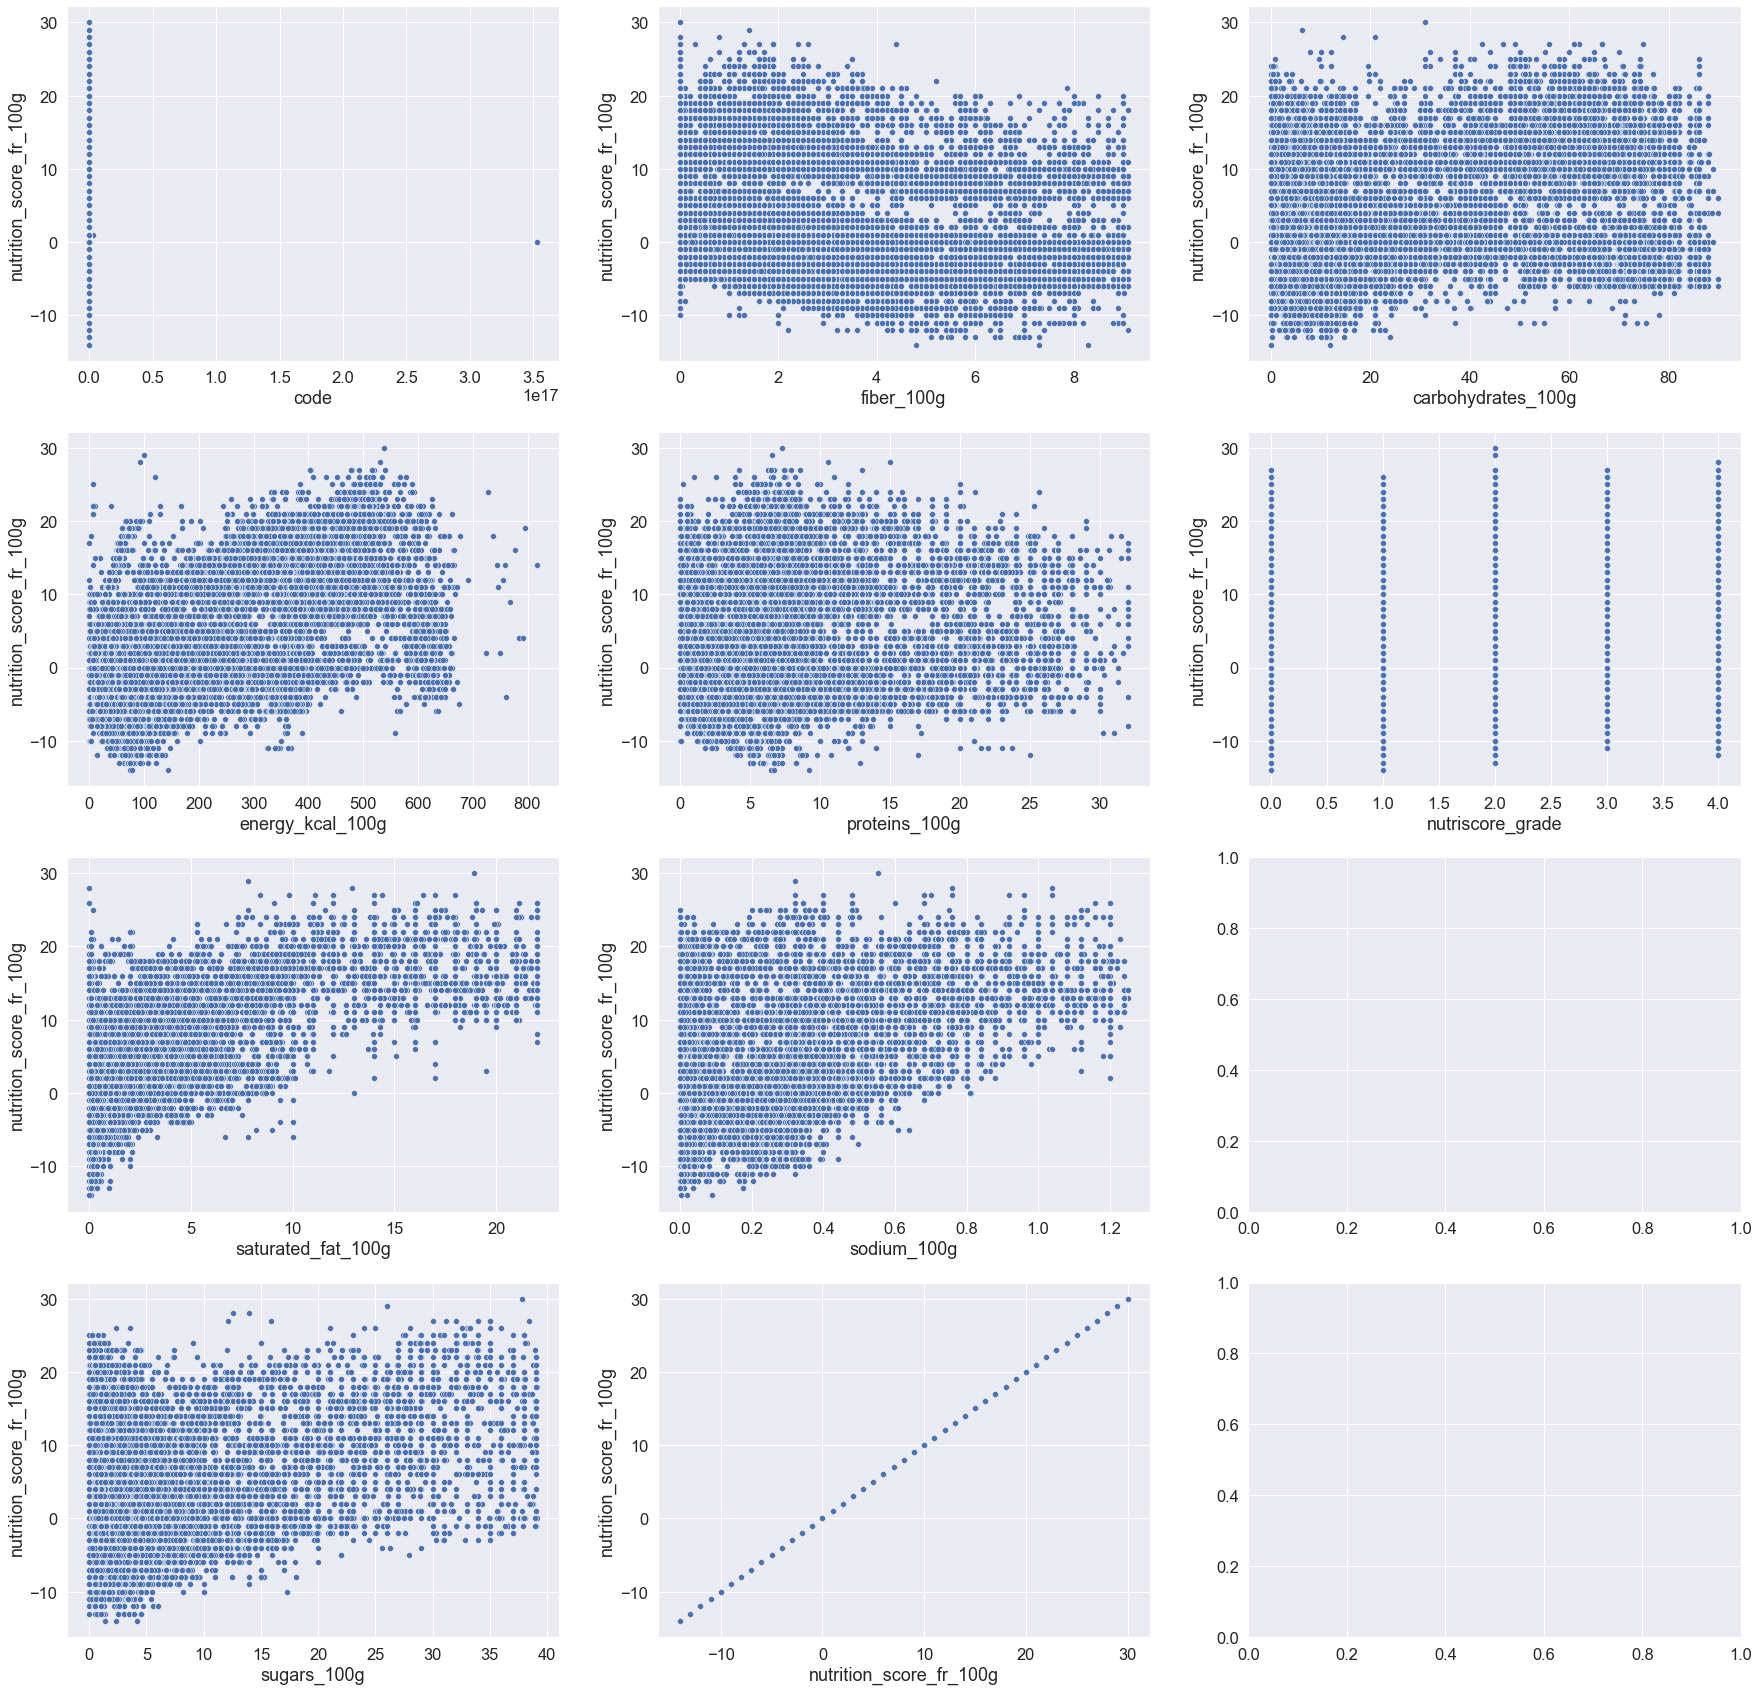

In [21]:
num_var = df_FR_food_1.dtypes[df_FR_food_1.dtypes.values != 'object'].index
f, axes = plt.subplots(4,3 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(num_var):
    sns.scatterplot(data=df_FR_food_1, x = feature, y= "nutrition_score_fr_100g",ax=axes[i%4, i//4])
sns.set(font_scale=1.5)

Les résultats du calcul our "nutrition_score_fr" donnent une valeur comprise entre –15 et +40. 

- La couleur verte correspondant à une valeur comprise entre –15 et –2, 
- le vert clair de –1 à +3, 
- le jaune de +4 à +11, 
- l'orange de +12 à +16 et 
- le rouge de +17 à +40.

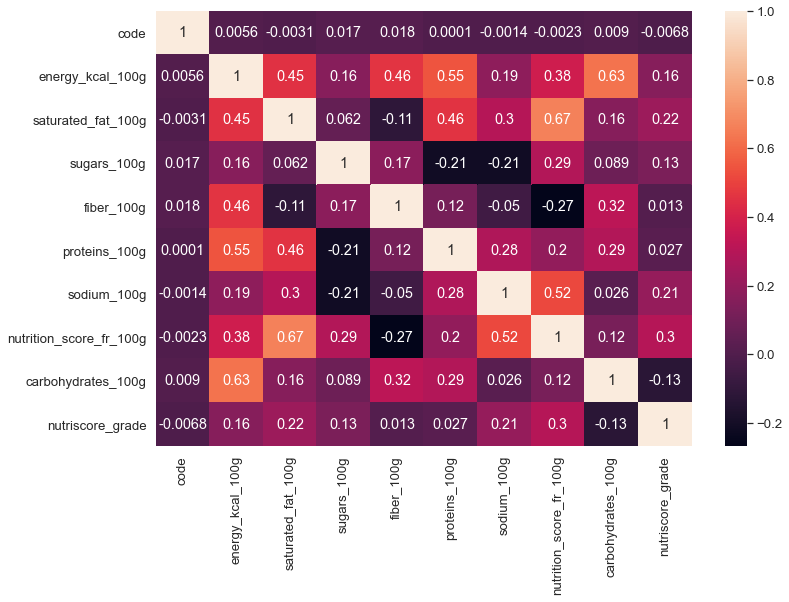

In [139]:
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 8))

df_corr = df_FR_food_1.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

#### Relation entre "nutrition_score_fr_100g" et "categories"

<AxesSubplot:xlabel='categories', ylabel='nutrition_score_fr_100g'>

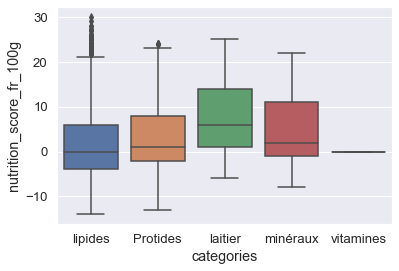

In [140]:
sns.boxplot(data=df_FR_food_1, x = 'categories', y= "nutrition_score_fr_100g")

In [142]:
df_FR_food['categories'].unique()

array(['Protides', 'Fruits & légumes', 'laitier', 'minéraux', 'lipides',
       'vitamines'], dtype=object)

### Analyse multivariable

### ANOVA

In [22]:
import scipy.stats as stats 

In [110]:
df_melt = pd.melt(df_FR_food_1.reset_index(), id_vars=['categories'], value_vars=[
       'saturated_fat_100g', 'fiber_100g', 'proteins_100g','carbohydrates_100g'])

In [111]:
df_melt

,categories,variable,value
0,lipides,saturated_fat_100g,9.60
1,lipides,saturated_fat_100g,18.70
2,lipides,saturated_fat_100g,3.40
3,lipides,saturated_fat_100g,3.40
4,lipides,saturated_fat_100g,3.40
...,...,...,...
95379,lipides,carbohydrates_100g,71.70
95380,lipides,carbohydrates_100g,88.63
95381,lipides,carbohydrates_100g,3.94
95382,lipides,carbohydrates_100g,2.70


In [112]:
df_melt.columns = ['categories', "groupes aliments", 'value']

In [113]:
df_melt

,categories,groupes aliments,value
0,lipides,saturated_fat_100g,9.60
1,lipides,saturated_fat_100g,18.70
2,lipides,saturated_fat_100g,3.40
3,lipides,saturated_fat_100g,3.40
4,lipides,saturated_fat_100g,3.40
...,...,...,...
95379,lipides,carbohydrates_100g,71.70
95380,lipides,carbohydrates_100g,88.63
95381,lipides,carbohydrates_100g,3.94
95382,lipides,carbohydrates_100g,2.70


In [69]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments

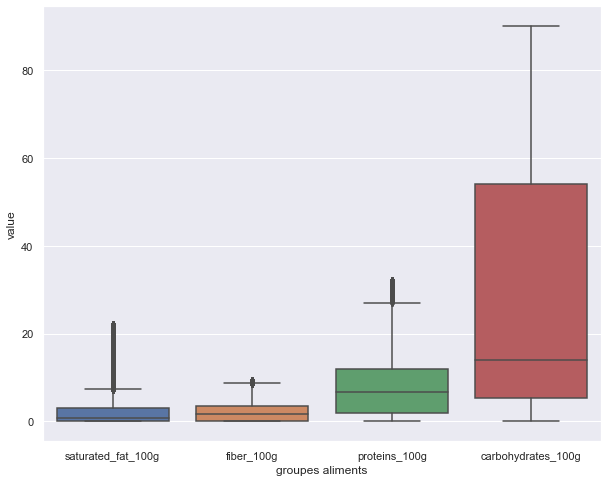

In [115]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="groupes aliments", y='value', data=df_melt)
sns.set(font_scale=1.0)



In [117]:
df_melt['Count']=df_melt['Count'].astype(int)

# Data Transformation
df_melt['newCount'],fitted_lambda = stats.boxcox(df_melt['Count'])

import matplotlib.pyplot as plt
sns.kdeplot(df_melt['newCount'],cumulative=False,bw=2)

KeyError: 'Count'

In [102]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df_FR_food_1['saturated_fat_100g'], df_FR_food_1['proteins_100g'],
                                df_FR_food_1['carbohydrates_100g'], df_FR_food_1['fiber_100g'],
                                df_FR_food_1['sugars_100g'],df_FR_food_1['sodium_100g']
                               )
fvalue ,pvalue

(16759.93818273427, 0.0)

In [103]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [109]:
# Ordinary Least Squares (OLS) model
model = ols("value ~ C(groupes aliments)", data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:



# output (ANOVA F and p value)
                sum_sq    df         F    PR(>F)
C(treatments)  3010.95   3.0  17.49281  0.000026
Residual        918.00  16.0       NaN       NaN

In [23]:
df_FR_food_1.columns

Index(['code', 'product_name', 'categories', 'energy_kcal_100g',
       'saturated_fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g', 'nutrition_score_fr_100g', 'carbohydrates_100g',
       'nutriscore_grade'],
      dtype='object')

<AxesSubplot:title={'center':'sugars_100g'}, xlabel='categories'>

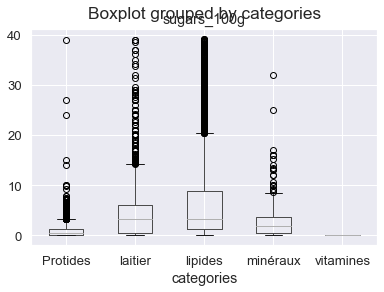

In [78]:
df_FR_food_1.boxplot('sugars_100g', by='categories')

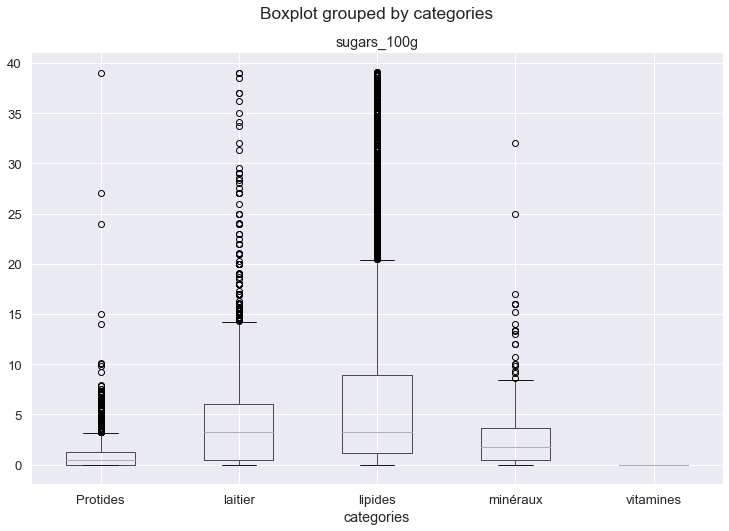

In [37]:
#Create a boxplot
df_FR_food_1.boxplot('sugars_100g', by='categories', figsize=(12, 8))

ctrl = df_FR_food_1['sugars_100g'][df_FR_food_1.categories == 'ctrl']

grps = pd.unique(df_FR_food_1.categories.values)
d_data = {grp:df_FR_food_1['sugars_100g'][df_FR_food_1.categories == grp] for grp in grps}

k = len(pd.unique(df_FR_food_1.categories))  # number of conditions
N = len(df_FR_food_1.values)  # conditions times participants
n = df_FR_food_1.groupby('categories').size()[0] #Participants in each condition

In [39]:
df_FR_food_1['categories'].unique()

array(['lipides', 'Protides', 'laitier', 'minéraux', 'vitamines'],
      dtype=object)

In [40]:
from scipy import stats

F, p = stats.f_oneway(d_data['lipides'], d_data['Protides'], d_data['laitier'], d_data['minéraux'], d_data['vitamines'])

In [41]:
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

In [44]:
SSbetween = (sum(df_FR_food_1.groupby('categories').sum()['sugars_100g']**2)/n) \
    - (df_FR_food_1['sugars_100g'].sum()**2)/N

In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('sugars_100g ~ categories',
                data=df_FR_food_1).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq       df           F  PR(>F)
categories  9.715736e+04      4.0  452.082095     0.0
Residual    1.280923e+06  23841.0         NaN     NaN
